In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import yfinance as yf

In [3]:
# Define the stock symbol (in this case, Tesla)
stock_symbol = "TSLA"

# Define the start and end dates for the data
start_date = "2010-06-29"
end_date = "2024-01-01"

# Use yfinance to fetch the data
tesla_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


reset the index

In [4]:
tesla_data.reset_index(inplace=True)

In [5]:
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


#   Webscraping to Extract Tesla Revenue Data

In [6]:
import requests
from bs4 import BeautifulSoup

In [15]:
url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [51]:
tesla_data=requests.get(url).text

#print(tesla_data)

# Parse the HTML content of the page

In [21]:
soup=BeautifulSoup(tesla_data,'html5lib')

In [23]:
# extract data from the table

tesla_revenue=pd.read_html(url)

In [39]:
tesla_revenue_dataframe=tesla_revenue[1]  # revenue dataframe was in index 1

In [30]:
# reset the columns name to Date and Revenue
tesla_revenue_dataframe.columns=['Date','Revenue']

Execute the following line to remove the comma and dollar sign from the Revenue column.

In [32]:
tesla_revenue_dataframe['Revenue']=tesla_revenue_dataframe['Revenue'].str.replace(',|\$',"")

C:\Users\hi\AppData\Local\Temp\ipykernel_11144\61884094.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue_dataframe['Revenue']=tesla_revenue_dataframe['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.

In [33]:
tesla_revenue_dataframe.dropna(inplace=True)

In [34]:
tesla_revenue_dataframe=tesla_revenue_dataframe[tesla_revenue_dataframe['Revenue'] !=""]

In [37]:
tesla_revenue_dataframe.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#  using yfinance to extract gamestop stock data

In [11]:
# Specify the stock symbol and the time period
stock_symbol = "GME"
start_date = "2002-02-13"
end_date = "2024-01-01"

Download historical stock data for GameStop

In [12]:
gme_data=yf.download(stock_symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [13]:
gme_data.reset_index(inplace=True)

In [14]:
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691667,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


# Web scraping to extract GameStop Revenue data

In [49]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [62]:
GME_data=requests.get(url).text

#print(GME_data)

In [67]:
GME_data=pd.read_html(url)    # extract data using pd.read_html

In [71]:
GME_revenue_df=GME_data[1]    # revenue data frame is in index 1

In [73]:
GME_revenue_df.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [76]:
GME_revenue_df.columns=['Date','Revenue']   # reset the columns name

Execute the following line to remove the comma and dollar sign from the Revenue column.

In [77]:
GME_revenue_df['Revenue']=GME_revenue_df['Revenue'].str.replace(',|\$',"")

C:\Users\hi\AppData\Local\Temp\ipykernel_11144\1656405951.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  GME_revenue_df['Revenue']=GME_revenue_df['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.

In [78]:
GME_revenue_df.dropna(inplace=True)

In [79]:
GME_revenue_df.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


#  Ploting Tesla stock graph

In [15]:
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


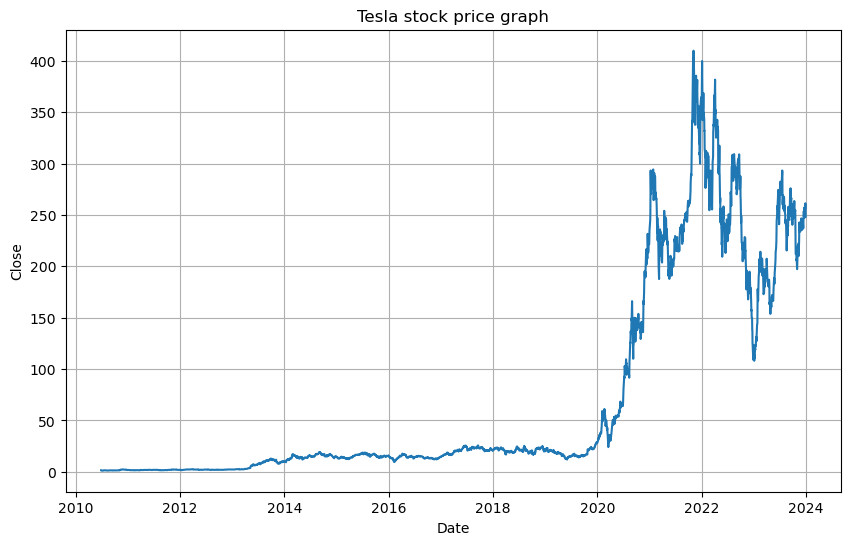

In [16]:
plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'],tesla_data['Close'])
plt.title('Tesla stock price graph')

plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)

#  Ploting GME stock price

In [17]:
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691667,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


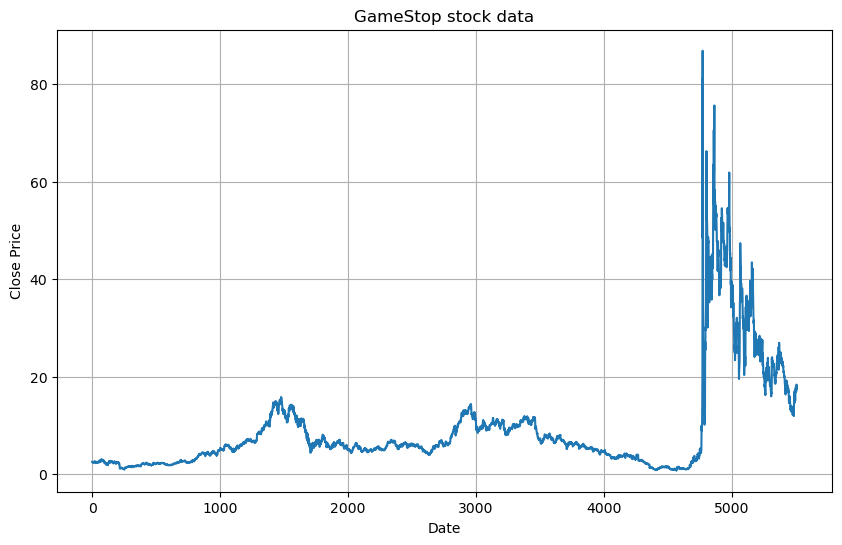

In [18]:
plt.figure(figsize=(10,6))
gme_data['Close'].plot()
plt.title('GameStop stock data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)